#  Python, Numpy y Pandas en ejecución

Objetivo: Conocer el desempeño de Python, Numpy y Pandas


NumPy proporciona un tipo de matriz N-dimensional ndarray, que describe una colección de "elementos" del mismo tipo. Los tipos de dato en Python(List, Tuple) y DataFrame de Pandas, a diferencia de las matrices en Numpy, son secuencias de objetos de diferentes tipos, por lo que el procesamiento de estos elementos toma mas tiempo. 

Se comparará la velocidad de trasnformar una lista a respectivos tipos de datos y la ejecución de las operaciones NumPy sum, Python sum, ciclo for y Pandas sum, así como sus resultados.



In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import random
import pandas as pd


velocidades = [] # se crea lista para guardar tiempos

In [2]:
import numpy as np
import time

# Muestras de datos
- Se comprueba el resultado con suma

In [3]:
lista = list(np.random.random(10000000)) # cantidad de datos random
print(len(lista))

10000000


# Lista de python a diferentes tipos de datos

- Lista a DataFrame

In [4]:
start=time.time()
df = pd.DataFrame(lista)

velocidades.append(time.time() - start)
df.sum(axis = 0).values

array([4999041.66161018])

- Lista a Series

In [5]:
start=time.time()
s = pd.Series(lista)

velocidades.append(time.time() - start)
s.sum(axis = 0)

4999041.661610179

- Lista a array np

In [6]:
start=time.time()
ar = np.array(lista)
velocidades.append(time.time() - start)
np.sum(ar)

4999041.661610179

## Gráficas

In [7]:
df = pd.DataFrame({'método':['pandas dataframe','pandas series', 'numpy'], 'tiempo':velocidades})
df

,método,tiempo
0,pandas dataframe,1.085122
1,pandas series,1.210037
2,numpy,0.916247


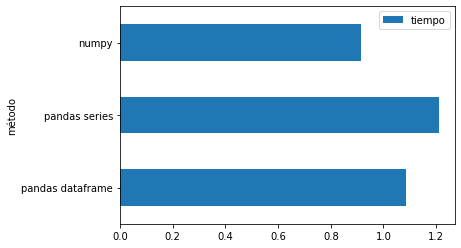

In [8]:
ax = df.plot.barh(x='método', y='tiempo')

# Arreglo de numpy a pandas y lista

- Arreglo de numpy a pandas

In [9]:
velocidades = []

In [10]:
start=time.time()
df = pd.DataFrame(data=ar.flatten())
velocidades.append(time.time() - start)
df.sum(axis = 0).values

array([4999041.66161018])

- Arreglo de numpy a lista

In [11]:
start=time.time()
list(ar)
velocidades.append(time.time() - start)
sum(ar)

4999041.661610189

- Arreglo de numpy a lista con 'tolist'

In [12]:
start=time.time()
ar.tolist()
velocidades.append(time.time() - start)

sum(ar)

4999041.661610189

## Gráficas

In [13]:
df = pd.DataFrame({'método':['numpy a pandas','list', 'np.tolist'], 'tiempo':velocidades})
df

,método,tiempo
0,numpy a pandas,0.205954
1,list,0.823191
2,np.tolist,0.295941


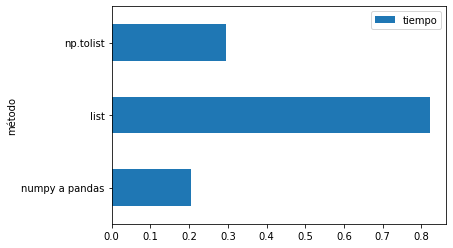

In [14]:
ax = df.plot.barh(x='método', y='tiempo')

# Ejecución Python, Numpy, Pandas

In [15]:
velocidades = []

## For loop

In [16]:
res = 0
start=time.time()
for i in lista:
    res = res + i

velocidades.append(time.time() - start)
print(res)

4999041.661610189


## Python sum

In [17]:
start=time.time()
res = sum(lista)

velocidades.append(time.time() - start)
print(res)

4999041.661610189


## Pandas DataFrame

In [18]:
df = pd.DataFrame(lista)
start=time.time()
res = df.sum(axis = 0).values

velocidades.append(time.time() - start)
print(res)

[4999041.66161018]


## Pandas Series

In [19]:
s = pd.Series(lista)

start=time.time()
res = s.sum(axis = 0)


velocidades.append(time.time() - start)
print(res)

4999041.661610179


## Numpy

In [20]:
a1 = np.array(lista)
start=time.time()
res = np.sum(a1)


velocidades.append(time.time() - start)
print(res)

4999041.661610179


In [21]:
len(velocidades)

5

## Gráficas

In [22]:
df = pd.DataFrame({'método':['for', 'python sum', 'pandas dataframe','pandas series', 'numpy'], 'tiempo':velocidades})
df

,método,tiempo
0,for,1.379570
1,python sum,0.942991
2,pandas dataframe,0.253914
3,pandas series,0.185896
4,numpy,0.009083


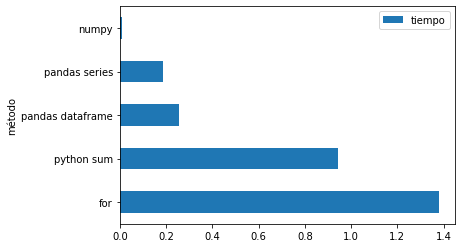

In [23]:
ax = df.plot.barh(x='método', y='tiempo')

# Velocidad de lectura numpy/pandas

Al entrenar modelos de aprendizaje máquina, puede ser conveniente usar el formato npy para nuestra base de datos. Se comprenderán las diferencias entre el formato txt, la lectura con Pandas 'read_csv' y npy, así como sus ventajas.

Entre mayor es el tamaño de las muestras en el dataset, es mas conveniente procesarlas en formato .npy. Cualquier dato numérico puede almacenarse en este formato.



- Creación de muestras 'np.random.choice(ndarray, size)'

In [24]:
lista = np.random.choice(10, 10000)

In [25]:
velocidades = []

np.savetxt('array.txt', lista.reshape((1,len(lista))) , fmt='%d', delimiter='|')


In [26]:
df = pd.DataFrame(lista)
df.to_csv(r'array.csv', sep='|', header=None)

- Lectura de datos txt 

In [27]:
start=time.time()
save = np.fromfile('array.txt', sep='|')
velocidades.append(time.time() - start)


- Comprobar con suma

In [28]:
res=np.sum(save)
print(save.shape)
print(res)

(10000,)
45247.0


- Lactura pandas

In [29]:
start=time.time()
df = pd.read_csv("array.csv", sep='|', header=None) 
velocidades.append(time.time() - start)

- Comprobar con suma

In [30]:
print(df.sum(axis = 0).values[1])

45247


- Guardando npy
 

In [31]:
np.save('array.npy', save)

- Lectura de datos npy

In [32]:
start=time.time()
load = np.load('array.npy')
velocidades.append(time.time() - start)

- Comprobar con suma

In [33]:
res=np.sum(load)
print(load.shape)
print(res)

(10000,)
45247.0


## Gráficas

In [34]:
df = pd.DataFrame({'método':['np.fromfile txt','pd.read_csv','np.load npy'], 'tiempo':velocidades})
df

,método,tiempo
0,np.fromfile txt,0.007094
1,pd.read_csv,0.007710
2,np.load npy,0.000792


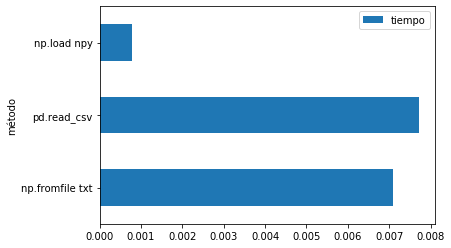

In [35]:
ax = df.plot.barh(x='método', y='tiempo')


- Comprobar tiempos de otras funciones 